# Exercise on Binning Strategies Using Kaggle's House Prices Dataset
This exercise aims to reinforce understanding and application of different binning strategies using the Kaggle House Prices dataset. 
The exercise includes both practical Python tasks and theoretical questions for each binning strategy.

### 1. Fixed-Width Binning
#### Practical Task:
Using Python, create fixed-width bins for the 'LotArea' feature in the dataset. Divide it into 5 equal intervals.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Data\home-data-for-ml-course\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


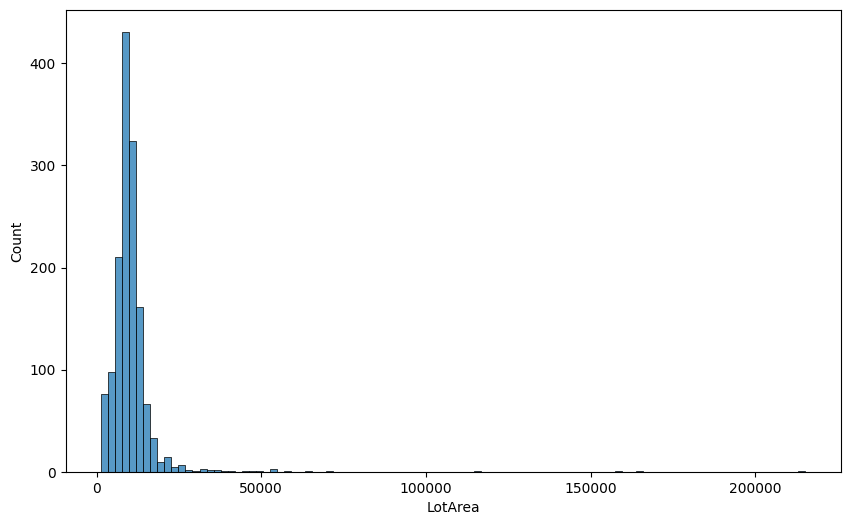

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df['LotArea'], bins=100)
plt.show()

In [4]:
labels = ['small', 'medium', 'large', 'XL', 'XXL']
df['LotArea_binned'] = pd.cut(df['LotArea'], bins=5, labels=labels)

In [5]:
df['LotArea_binned'].value_counts()

LotArea_binned
small     1447
medium       9
XL           2
large        1
XXL          1
Name: count, dtype: int64

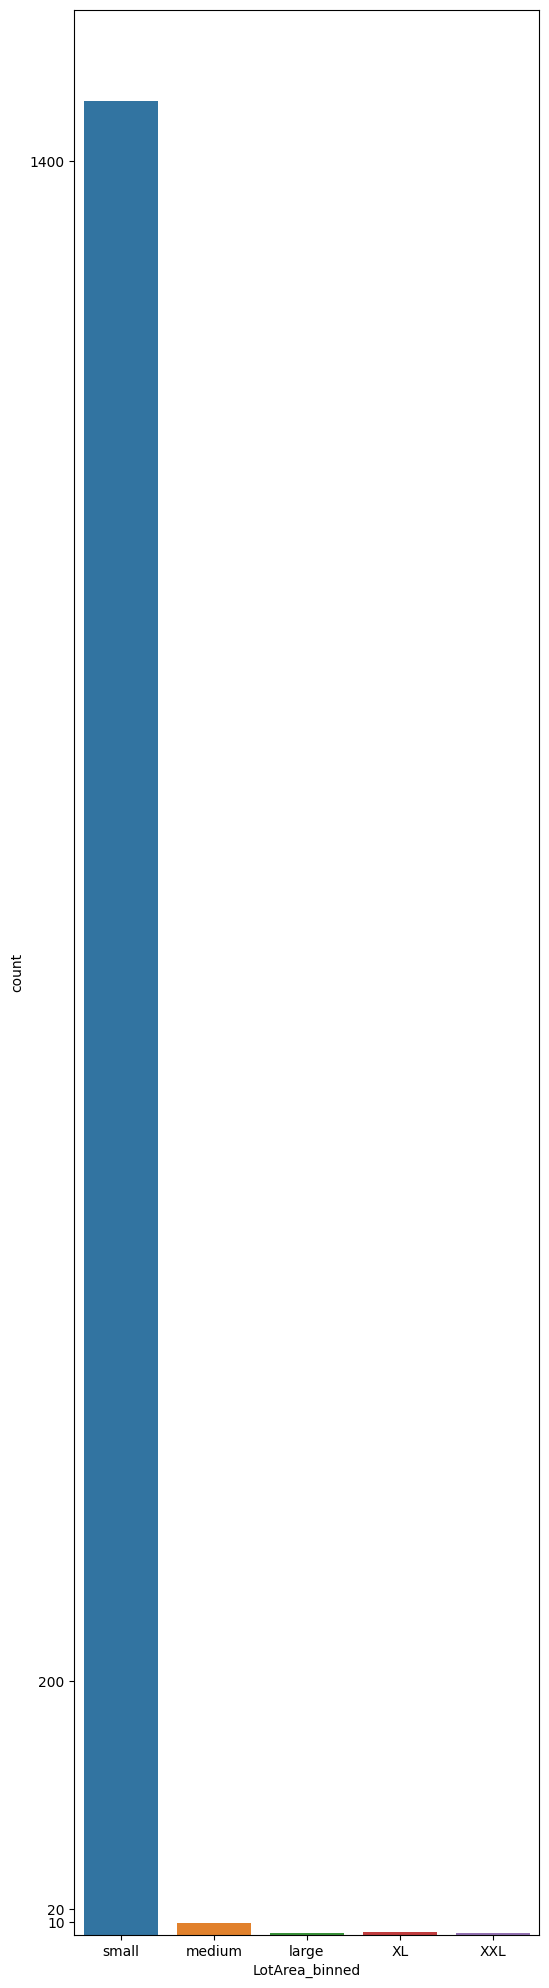

In [34]:
lot_area_binned = df['LotArea_binned'].value_counts().to_frame()

plt.figure(figsize=(6, 25))
sns.barplot(data=lot_area_binned, y='count', x=lot_area_binned.index, hue=lot_area_binned.index)
plt.yticks([10, 20, 200, 1400])
plt.show()

#### Theoretical Question:
How might fixed-width binning be advantageous or disadvantageous when dealing with noisy data in a dataset feature?

Fixed-width binning might be advantageous when dealing with noisy data in a dataset feature:
1. Fixed-width binning can smooth out minor fluctuations in the data that should be ignored by reducing the granularity of the distribution of the data. This insures these fluctuations do not affect the performance of the model.
2. Fixed-width binning can take care of outliers in the data by absorbing them into the bins at the ends. This way, they do not affect the entire dataset.
3. Fixed-width binning simplify the data so that it can be interpreted better.

Fixed-width binning might be disadvantageous when dealing with noisy data in a dataset feature:
1. Fixed-width binning can lead to loss of small nuances in the data in cases where they are important.
2. Fixed-width binning has arbitrary bin edges and can, therefore, introduce bias and misrepresentation of the distribution of the data.
3. Fixed-width binning may not conform to the original distribution of the data, leading to some bins having may data-points and others having much less. The fixed-width binning above is a good example of this.

### 2. Distribution/User Knowledge-Based Binning
#### Practical Task:
Create custom bins for 'YearBuilt' based on historical periods: Pre-1900, 1900-1950, 1951-2000, Post-2000.

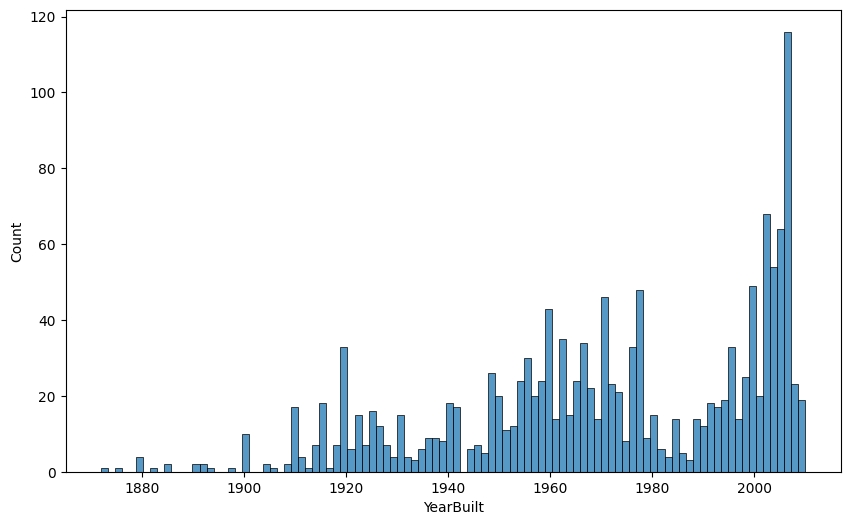

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df['YearBuilt'], bins=100)
plt.show()

In [8]:
bins = [0, 1899, 1950, 2000, pd.Timestamp('now').year]
labels = ['Pre-1900', '1900-1950', '1951-2000', 'Post-2000']

df['YearBuilt_binned'] = pd.cut(df['YearBuilt'], labels=labels, bins=bins)
df['YearBuilt_binned'].value_counts().sort_index()

YearBuilt_binned
Pre-1900      15
1900-1950    323
1951-2000    758
Post-2000    364
Name: count, dtype: int64

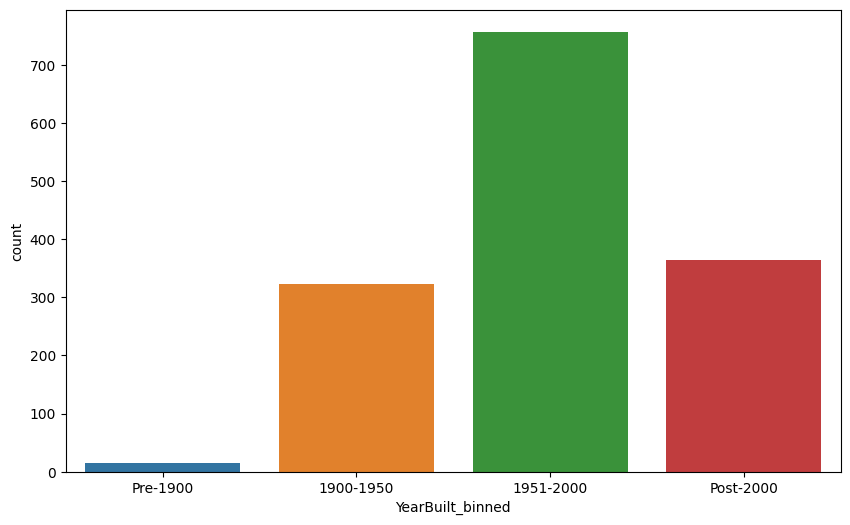

In [9]:
binned_year_built = df['YearBuilt_binned'].value_counts().to_frame()

plt.figure(figsize=(10, 6))
sns.barplot(data=binned_year_built, y='count', x=binned_year_built.index, hue=binned_year_built.index)
plt.show()

#### Theoretical Question:
How does incorporating domain knowledge into binning enhance the analysis of the data?

Incorporating domain knowledge into binning enhances the analysis of the data by representing its distribution realistically as it is in the real world. Unlike fixed-width binning, the original distribution is much less affected in a way that can introduce bias.

### 3. Quantile-Based Binning
#### Practical Task:
Use quantile-based binning to divide the 'SalePrice' feature into 4 bins of equal size.

In [10]:
labels = ['1st', '2nd', '3rd', '4th']
df['SalePrice_binned'] = pd.qcut(df['SalePrice'], q=4, labels=labels)
df['SalePrice_binned'].value_counts()

SalePrice_binned
2nd    367
3rd    366
1st    365
4th    362
Name: count, dtype: int64

#### Theoretical Question:
In what situations is quantile-based binning particularly advantageous, and why?

Quantile-based binning is particularly advantageous in the following situations:
1. When a feature's data is very skewed. Creating quantile-based bins insures a more even distribution of data across bins, to avoid situations where some bins have only a small number of data-points compared to others.
2. When using methods that don't assume a normal distribution of the data. Quantile-based binning allows segmentation of the data without relying on its original distribution.
3. In features where the outliers are important and shouldn't be discarded but their impact should still be mitigated. In this way, the distribution of the data is still representative of the actual world, but extreme values don't introduce bias.